In [1]:
from loica import *
import matplotlib.pyplot as plt
import numpy as np

In [2]:
rep = GeneticNetwork()

alpha = 1e4
gamma = 0.3
nx = 250

laci = Regulator(name='LacI', degradation_rate=gamma, init_concentration=np.zeros((nx,))+5)
tetr = Regulator(name='TetR', degradation_rate=gamma, init_concentration=np.zeros((nx,)))
ci = Regulator(name='cI', degradation_rate=gamma, init_concentration=np.zeros((nx,)))
rep.add_regulator(laci)
rep.add_regulator(tetr)
rep.add_regulator(ci)

sfp1 = Reporter(name='CFP', degradation_rate=gamma, init_concentration=np.zeros((nx,))+5)
rep.add_reporter(sfp1)
sfp2 = Reporter(name='YFP', degradation_rate=gamma, init_concentration=np.zeros((nx,)))
rep.add_reporter(sfp2)
sfp3 = Reporter(name='RFP', degradation_rate=gamma, init_concentration=np.zeros((nx,)))
rep.add_reporter(sfp3)

rep.add_operator(Not(input=ci, output=laci, a=alpha, b=0, K=1, n=2))
rep.add_operator(Not(input=laci, output=tetr, a=alpha, b=0, K=1, n=2))
rep.add_operator(Not(input=tetr, output=ci, a=alpha, b=0, K=1, n=2))

rep.add_operator(Not(input=ci, output=sfp1, a=alpha, b=0, K=1, n=2))
rep.add_operator(Not(input=laci, output=sfp2, a=alpha, b=0, K=1, n=2))
rep.add_operator(Not(input=tetr, output=sfp3, a=alpha, b=0, K=1, n=2))

In [3]:
col = Colony(rep, 1, 1)

In [10]:
kymo = col.kymograph(nx=nx, nt=100, t0=0, tmax=48)

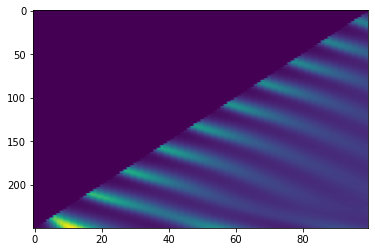

In [11]:
plt.imshow(kymo[:,:,0], aspect='auto')